In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
# 1. #3 (age)
# 2. #4 (sex)
# 3. #9 (cp)
# 4. #10 (trestbps)
# 5. #12 (chol)
# 6. #16 (fbs)
# 7. #19 (restecg)
# 8. #32 (thalach)
# 9. #38 (exang)
# 10. #40 (oldpeak)
# 11. #41 (slope)
# 12. #44 (ca)
# 13. #51 (thal)
# 14. #58 (num) (the predicted attribute)
# num: diagnosis of heart disease (angiographic disease status)
# -- Value 0: < 50% diameter narrowing
# -- Value 1: > 50% diameter narrowing
# Experiments with the Cleveland database have concentrated on simply
#      attempting to distinguish presence (values 1,2,3,4) from absence (value
#      0).  

feature_labels = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

In [ ]:
df = pd.read_csv('processed.cleveland.data', names=feature_labels)

FileNotFoundError: ignored

### Data Cleaning

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
# Indicate presence or absence of disease, extent of disease is irrelevant

df['num'] = np.where((df['num']>0),1,0)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [ ]:
# checking if missing values are present in object dtypes

print(df['ca'].unique())
print(df['thal'].unique())

['0.0' '3.0' '2.0' '1.0' '?']
['6.0' '3.0' '7.0' '?']


In [ ]:
# check how many instances of ? are in both cols

print(df['ca'].value_counts())
print(df['thal'].value_counts())

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64
3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64


In [ ]:
# since missing values are few in number, we can remove them from analysis

sum(df['ca'].values=='?')
droplist=df.loc[df['ca']=='?'].index.tolist()
df.drop(droplist,axis=0,inplace=True)
df['ca']=df['ca'].astype(str).astype(float).astype(int)


sum(df['thal'].values=='?')
droplist=df.loc[df['thal']=='?'].index.tolist()
df.drop(droplist,axis=0,inplace=True)
df['thal']=df['thal'].astype(str).astype(float).astype(int)

In [ ]:
# removed missing values and have 297 rows remaining now
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0,6,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3,3,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2,7,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0,3,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0,7,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0,7,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2,7,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1,7,1


In [ ]:
# converting float to int

df['sex']=df['sex'].astype(str).astype(float).astype(int)
df['cp']=df['cp'].astype(str).astype(float).astype(int)

In [ ]:
# Checking for presence of nulls

df.isnull().values.any()

False

In [ ]:
# Checking for duplicate values

print ('Number of duplicated vales: {}'.format(df.duplicated().sum()))

Number of duplicated vales: 0


### EDA & Feature Engineering

In [ ]:
# Creating new df with more easy-to-understand column names while doing EDA
df1=df.copy()

# Renaming columns
df1.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'condition']

In [ ]:
pd.options.mode.chained_assignment = None
df1['sex'][df1['sex'] == 0] = 'Female'
df1['sex'][df1['sex'] == 1] = 'Male' 

df1['chest_pain_type'][df1['chest_pain_type'] == 0] = 'Typical angina'
df1['chest_pain_type'][df1['chest_pain_type'] == 1] = 'Atypical angina'
df1['chest_pain_type'][df1['chest_pain_type'] == 2] = 'Non-anginal pain'
df1['chest_pain_type'][df1['chest_pain_type'] == 3] = 'Asymptomatic'

df1['fasting_blood_sugar'][df1['fasting_blood_sugar'] == 0] = 'Lower than 120mg/ml'
df1['fasting_blood_sugar'][df1['fasting_blood_sugar'] == 1] = 'Greater than 120mg/ml'

df1['rest_ecg'][df1['rest_ecg'] == 0] = 'Normal'
df1['rest_ecg'][df1['rest_ecg'] == 1] = 'ST-T wave abnormality'
df1['rest_ecg'][df1['rest_ecg'] == 2] = 'Left ventricular hypertrophy'

df1['exercise_induced_angina'][df1['exercise_induced_angina'] == 0] = 'No'
df1['exercise_induced_angina'][df1['exercise_induced_angina'] == 1] = 'Yes'

df1['st_slope'][df1['st_slope'] == 0] = 'Upsloping'
df1['st_slope'][df1['st_slope'] == 1] = 'Flat'
df1['st_slope'][df1['st_slope'] == 2] = 'Downsloping'

df1['thalassemia'][df1['thalassemia'] == 0] = 'Normal'
df1['thalassemia'][df1['thalassemia'] == 1] = 'Fixed defect'
df1['thalassemia'][df1['thalassemia'] == 2] = 'Reversable defect'

df1['condition'][df1['condition'] == 0] = 'No'
df1['condition'][df1['condition'] == 1] = 'Yes'

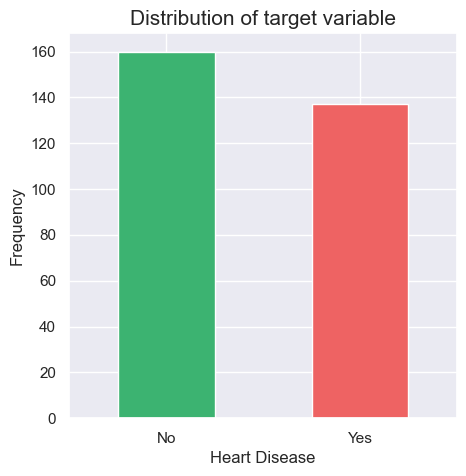

In [ ]:
sns.set(style="darkgrid")
df1.condition.value_counts().plot(kind="bar",figsize=(5,5),color=['#3CB371','#EE6363'])
plt.title('Distribution of target variable',fontsize=15)
plt.xlabel('Heart Disease',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(rotation=0)
plt.show()

1    201
0     96
Name: sex, dtype: int64


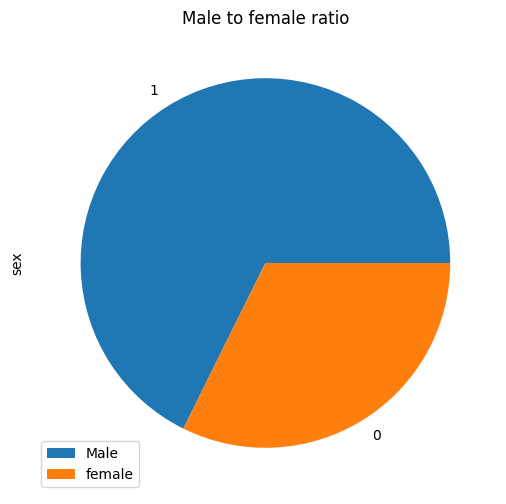

In [ ]:
# Gender and its correlation with heart disease

print (df['sex'].value_counts())
df['sex'].value_counts().plot(kind = 'pie', figsize = (8,6))
plt.title('Male to female ratio')
plt.legend(['Male','female'])

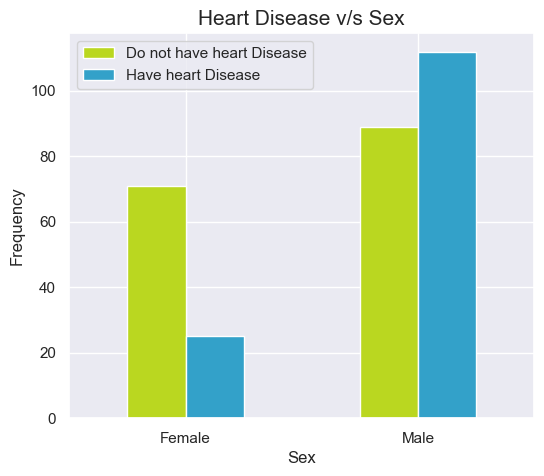

In [ ]:
sns.set(style="darkgrid")
pd.crosstab(df1.sex,df1.condition).plot(kind="bar",figsize=(6,5),color=['#BAD720',"#33A1C9"])
plt.title('Heart Disease v/s Sex',fontsize=15)
plt.xlabel('Sex',fontsize=12)
plt.xticks(rotation=0)
plt.legend(["Do not have heart Disease", "Have heart Disease"])
plt.ylabel('Frequency',fontsize=12)
plt.show()

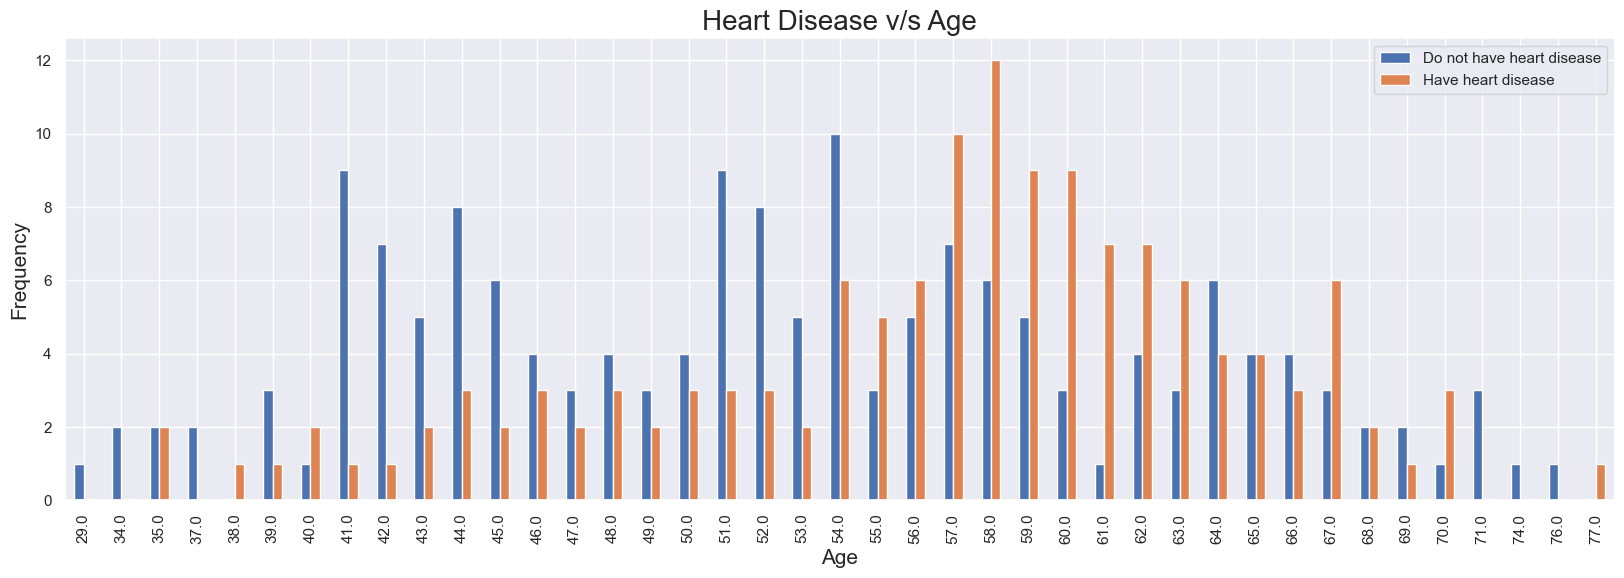

In [ ]:
sns.set(style="darkgrid")
pd.crosstab(df1.age, df1.condition).plot(kind="bar", figsize=(20, 6), ax=plt.gca())
plt.title("Heart Disease v/s Age",fontsize=20)
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("Age",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

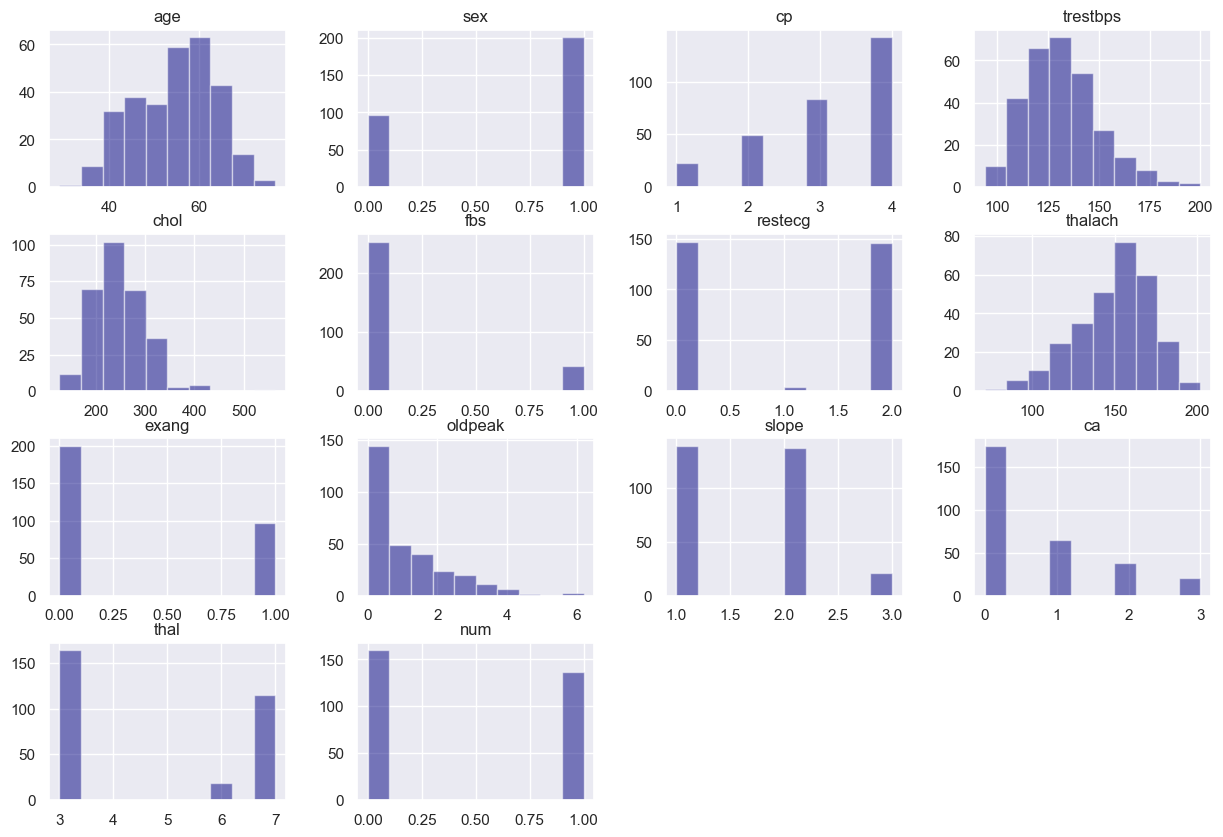

In [ ]:
sns.set(style="darkgrid")
df.hist(bins=10,figsize=(15,10) ,color = 'navy', alpha = 0.5)
plt.show()

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
# Encoding categorical variables for better predictions

a = pd.get_dummies(df["cp"], prefix="cp",drop_first=True)
b = pd.get_dummies(df["thal"], prefix="thal",drop_first=True)
c = pd.get_dummies(df["slope"], prefix="slope",drop_first=True)
d = pd.get_dummies(df["ca"], prefix="ca",drop_first=True)
e = pd.get_dummies(df["restecg"], prefix="restecg",drop_first=True)

In [ ]:
frames = [df, a, b, c, d, e]
df = pd.concat(frames, axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_4,thal_6,thal_7,slope_2.0,slope_3.0,ca_1,ca_2,ca_3,restecg_1.0,restecg_2.0
0,63.0,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,...,0,1,0,0,1,0,0,0,0,1
1,67.0,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,...,1,0,0,1,0,0,0,1,0,1
2,67.0,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,...,1,0,1,1,0,0,1,0,0,1
3,37.0,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,...,0,0,0,0,1,0,0,0,0,0
4,41.0,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df = df.drop(columns=["cp", "thal", "slope","ca","restecg"])
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_2,...,cp_4,thal_6,thal_7,slope_2.0,slope_3.0,ca_1,ca_2,ca_3,restecg_1.0,restecg_2.0
0,63.0,1,145.0,233.0,1.0,150.0,0.0,2.3,0,0,...,0,1,0,0,1,0,0,0,0,1
1,67.0,1,160.0,286.0,0.0,108.0,1.0,1.5,1,0,...,1,0,0,1,0,0,0,1,0,1
2,67.0,1,120.0,229.0,0.0,129.0,1.0,2.6,1,0,...,1,0,1,1,0,0,1,0,0,1
3,37.0,1,130.0,250.0,0.0,187.0,0.0,3.5,0,0,...,0,0,0,0,1,0,0,0,0,0
4,41.0,0,130.0,204.0,0.0,172.0,0.0,1.4,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Scaling so that model trains better and does not overfit wrong features

X = df.drop(['num'], axis= 1)
y= pd.DataFrame(data['num'])

# Scale Data

scaler = MinMaxScaler()
X=MinMaxScaler().fit_transform(X.values)
X = pd.DataFrame(X)
X.columns=(df.drop(['num'], axis= 1)).columns

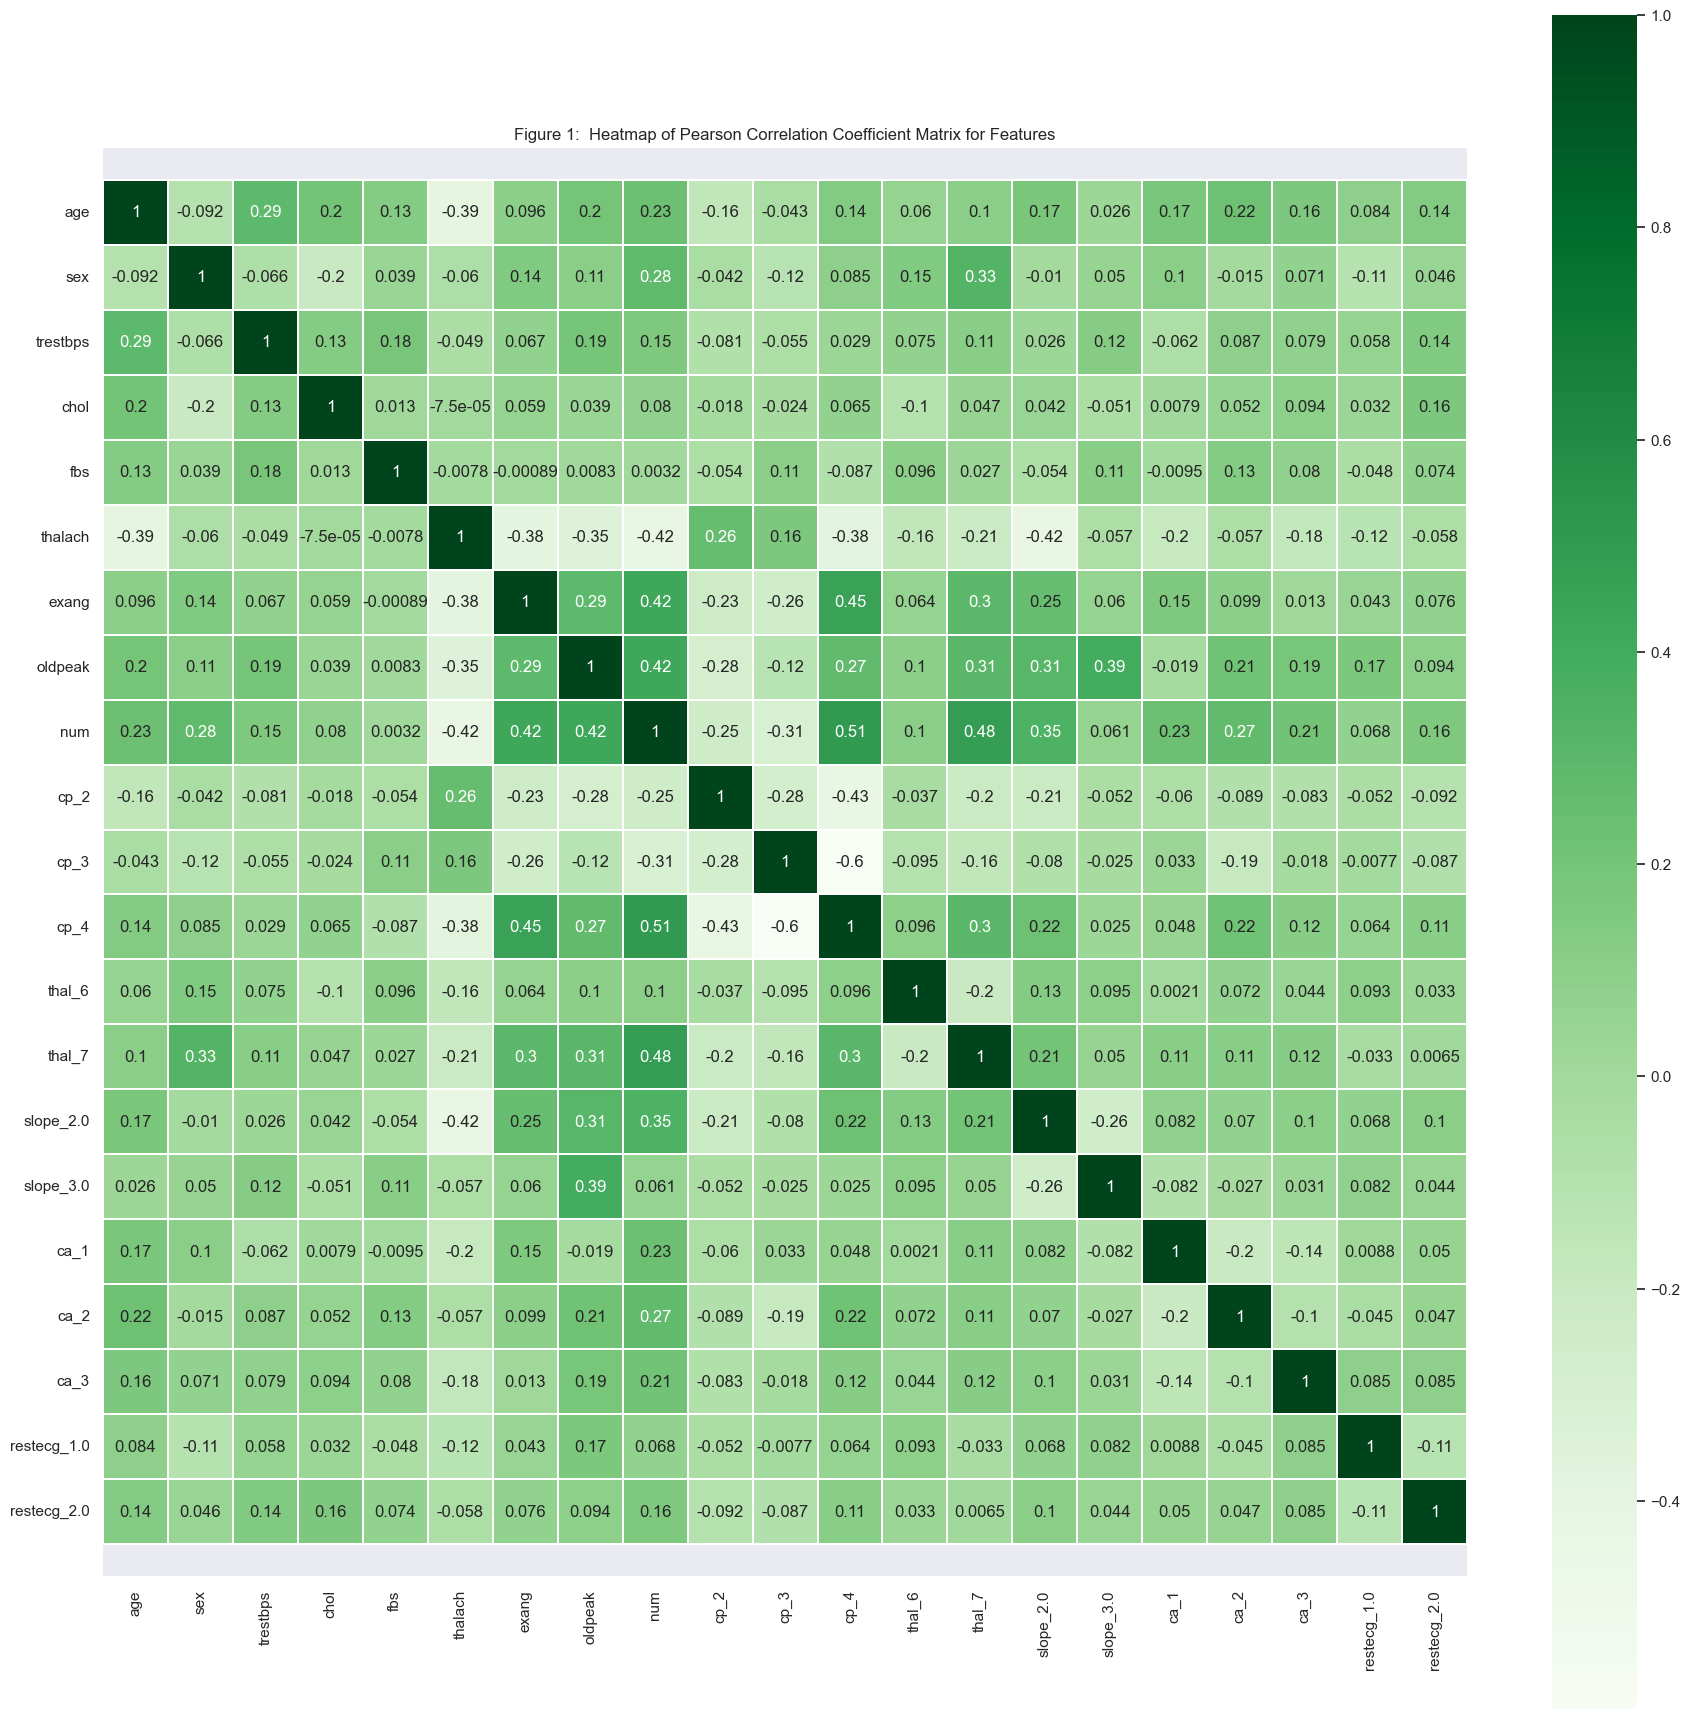

In [ ]:
fix,ax = plt.subplots(figsize=(22,22))
heatmap_data = df
sns.heatmap(heatmap_data.corr(),vmax=1,linewidths=0.01,
            square=True,annot=True,linecolor="white", cmap='Greens')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
heatmap_title='Figure 1:  Heatmap of Pearson Correlation Coefficient Matrix for Features'
ax.set_title(heatmap_title)
plt.show()

## Data Modelling and performance comparison

In [ ]:
# Saving 20% of data for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42) 

In [ ]:
X_train=pd.DataFrame(X_train)
y_train=pd.DataFrame(y_train)

X_test=pd.DataFrame(X_test)
y_test=pd.DataFrame(y_test)

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, f1_score, accuracy_score, recall_score, roc_auc_score, roc_curve

## Logistic Regression


Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.



In [ ]:
accuracies = {}

lr = LogisticRegression()
lr.fit(X_train, y_train)

# getting the training Set Predictions
y_train_pred = lr.predict(X_train)

# getting the test Set Predictions
y_test_pred = lr.predict(X_test)

acc = lr.score(X_test, y_test) * 100
accuracies["Logistic Regression"] = acc

/Users/abhilasha/Desktop/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
acc

88.33333333333333

In [ ]:
print(classification_report(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       130
           1       0.83      0.88      0.85       107

    accuracy                           0.86       237
   macro avg       0.86      0.87      0.86       237
weighted avg       0.87      0.86      0.87       237



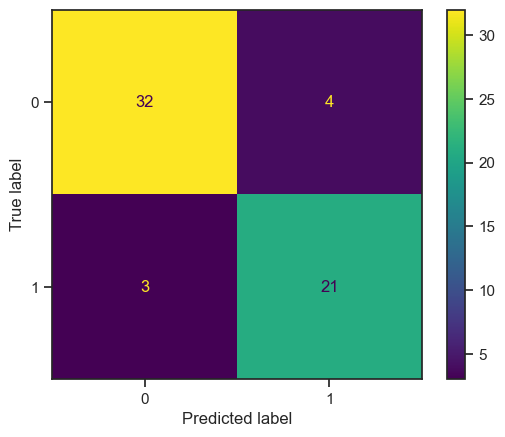

In [ ]:
sns.set(style="ticks")
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)
plt.show()

## Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_train_pred2 = nb.predict(X_train)
y_test_pred2 = nb.predict(X_test)

acc = nb.score(X_test, y_test) * 100
accuracies["Naive Bayes"] = acc

/Users/abhilasha/Desktop/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(classification_report(y_train_pred2,y_train))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83       132
           1       0.77      0.83      0.80       105

    accuracy                           0.81       237
   macro avg       0.81      0.82      0.81       237
weighted avg       0.82      0.81      0.81       237



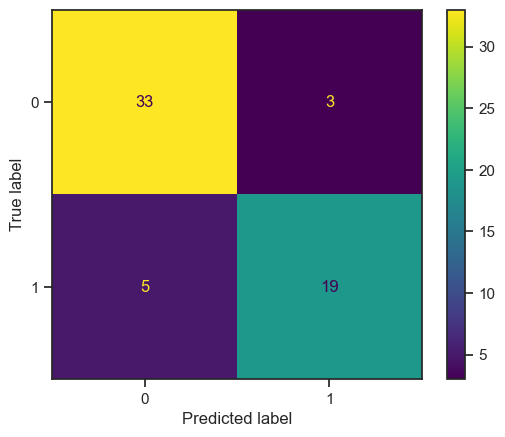

In [ ]:
ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test)
plt.show()

In [ ]:
accuracies

{'Logistic Regression': 88.33333333333333, 'Naive Bayes': 86.66666666666667}

In [ ]:
# LR has a slightly higher accuracy than Naive Bayes